 # Classifying Fashion-MNIST

---


![Fashion Mnsit](https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)

---



# Importing important Packages

---
![Pytorch Image](https://i.ytimg.com/vi/QscEWm0QTRY/maxresdefault.jpg)

**PyTorch and Numpy are Our Main Framework **


In [0]:
import torch # the main framework we are working on
from torchvision import datasets #to get our data (MNIST)
import torchvision.transforms as transforms #and transform it to arrays(tensors) and normalize it
import numpy as np # to deal with math and matrecies
import matplotlib.pyplot as plt 
%matplotlib inline
#above 2 lines for visualizing the data
from torch.utils.data.sampler import SubsetRandomSampler

# Loading the Data

---

![alt text](https://i.imgur.com/k9GyXLC.gif)

In [13]:
#loading the data
batch_size = 20
valid_size = 0.2
transform = transforms.Compose([transforms.ToTensor(),
                                   transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])])
train_images = datasets.FashionMNIST(root='data',download='True'
                                ,train=True,
                               transform = transform)
test_images = datasets.FashionMNIST(root='data',download='True'
                                ,train=False,
                               transform = transform)
num_of_training_data = len(train_images)
num_of_testing_data = len(test_images)
print('We have ', num_of_training_data," Training Image")
print('We have ', num_of_testing_data," Testing Image")
training_indicies = list(range(num_of_training_data))
np.random.shuffle(training_indicies)
num_of_validation_data = int(valid_size * num_of_training_data)
print("we have ", num_of_validation_data , ' image for validataion')
print("after taking validation images we have ", (num_of_training_data - num_of_validation_data) , " image for training")


validation_idx , training_idx = training_indicies[:num_of_validation_data] , training_indicies[num_of_validation_data:]
train_sampler = SubsetRandomSampler(training_idx)
valid_sampler = SubsetRandomSampler(validation_idx)
train_loader = torch.utils.data.DataLoader(train_images,batch_size=batch_size,sampler=train_sampler)
valid_loader = torch.utils.data.DataLoader(train_images,batch_size=batch_size,sampler = valid_sampler)
test_loader =  torch.utils.data.DataLoader(test_images,batch_size=batch_size)

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'T-Ankle boot']



We have  60000  Training Image
We have  10000  Testing Image
we have  12000  image for validataion
after taking validation images we have  48000  image for training


# Visualizing the Data

---



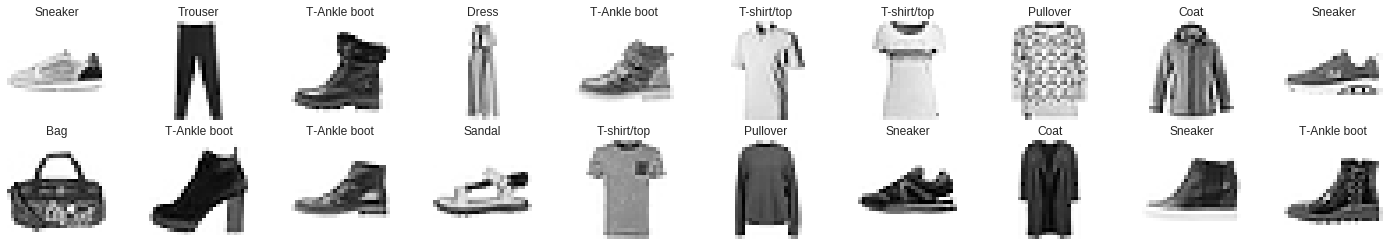

In [15]:
dataIter = iter(train_loader)
images , labels = dataIter.next()
#print(images[0])

fig = plt.figure(figsize=(25,4))
for i in range(batch_size):
  single_image = fig.add_subplot(2,10,i+1,xticks=[],yticks=[])
  single_image.imshow(np.squeeze(images[i]))
  single_image.set_title(classes[labels[i].item()])



# Defining the Architecture Of the *"MLP"* Neural Network

---

![Neural Network Architechture](https://cdn-images-1.medium.com/max/1600/1*K5Tm4PUZi7mj5GV-OBW8oQ.png)

In [29]:
#defining our neural network as :
               #############
               #    MLP    #
               #############
from torch import nn , optim
import torch.nn.functional as F
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x
model = Classifier()
model

Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

# **Defining the Loss (Error Funcion) and the (Optimizer)**

---



In [0]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

# Training the Neural Network on the Training Data  

---



In [44]:
#the training loop
epochs =100
valid_loss_min = np.Inf
model.train()
for e in range(epochs):
    ###################
    # train the model #
    ###################
  training_loss = 0.0
  vaidation_loss = 0.0
  for  (images, labels) in(train_loader):
    optimizer.zero_grad()
    output = model.forward(images)
    train_loss = loss_function(output,labels)
    train_loss.backward()
    optimizer.step()
    ######################    
    # validate the model #
    ######################
  print("The Training Loss is ",train_loss.item(), " for epoch ",e+1)
  model.eval()
  for images , labels in(valid_loader):
    output = model(images)
    valid_loss = loss_function(output,labels)
  if (valid_loss <= valid_loss_min):
    print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
    torch.save(model.state_dict(), 'model.pt')
    valid_loss_min = valid_loss
    


The Training Loss is  0.26410406827926636  for epoch  1
Validation loss decreased (inf --> 0.273823).  Saving model ...
The Training Loss is  0.10286296904087067  for epoch  2
The Training Loss is  0.2507239282131195  for epoch  3
The Training Loss is  0.08907411992549896  for epoch  4
The Training Loss is  0.10618822276592255  for epoch  5
The Training Loss is  0.0013044268125668168  for epoch  6
Validation loss decreased (0.273823 --> 0.070941).  Saving model ...
The Training Loss is  0.00856687594205141  for epoch  7
Validation loss decreased (0.070941 --> 0.014618).  Saving model ...
The Training Loss is  0.0233582966029644  for epoch  8
The Training Loss is  0.13222149014472961  for epoch  9
The Training Loss is  0.009919220581650734  for epoch  10
The Training Loss is  0.10656245797872543  for epoch  11
The Training Loss is  0.13846156001091003  for epoch  12
The Training Loss is  0.03097364865243435  for epoch  13
The Training Loss is  0.004032996483147144  for epoch  14
The Tra

# Testing it's Accuracy

---



In [46]:
model.load_state_dict(torch.load('model.pt'))
#Testing the Neural to see it's accuracy
model.eval() #just to make the neural network know that we are in the evaluation mode so we dont  want to update the weights
correct_for_all = 0
for images , labels in (test_loader):
  output  = model(images)
  _ , pred = torch.max(output,1)
  correct_for_batch = (pred.eq(labels))#we are comparing the model result with the true result stored in the model if true will lead to 1 otherwise 0
  correct_for_all +=correct_for_batch.sum()
  
print("Accuracy = ",(correct_for_all.item()/(len(test_loader)*batch_size))*100, "%")

  

Accuracy =  88.78 %


# Visuzlizing the Results

---



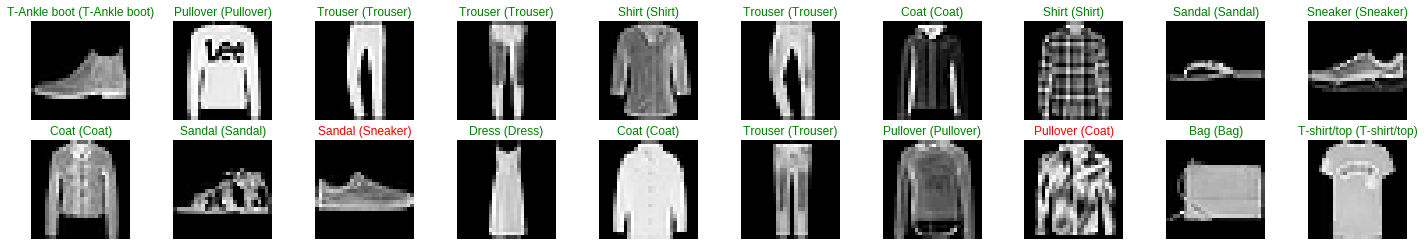

In [48]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])),
                 color=("green" if preds[idx]==labels[idx] else "red"))